In [1]:
rm(list=ls())

#########################################################################
### -- ANALÍTICA PREDICTIVA DE DATOS -- ## 
#########################################################################

#########################################################################

#########################################################################

setwd("C:/Users/Aron/Desktop/Analitica/S5")

In [2]:
########### 1) LIBRERIAS A UTILIZAR ################# 

library(mlr)
library(nnet)
library(sqldf)
library(reshape2)
library(ggplot2)
library(caret)
library(e1071)

Warning message:
"package 'mlr' was built under R version 3.6.3"Loading required package: ParamHelpers
Warning message:
"package 'ParamHelpers' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
'mlr' is in maintenance mode since July 2019. Future development
efforts will go into its successor 'mlr3' (<https://mlr3.mlr-org.com>).
Warning message:
"package 'sqldf' was built under R version 3.6.3"Loading required package: gsubfn
Warning message:
"package 'gsubfn' was built under R version 3.6.3"Loading required package: proto
Warning message:
"package 'proto' was built under R version 3.6.3"
Attaching package: 'gsubfn'

The following object is masked from 'package:mlr':

    fn

Loading required package: RSQLite
Warning message:
"package 'RSQLite' was built under R version 3.6.3"Loading required package: lattice

Attaching package: 'caret'

The following object is mask

In [3]:
########### 2) DATA A UTILIZAR #################

## En Rstudio Cloud utilizar el siguiente comando
# datos <- read.csv("./DataMultinomial.csv")

## En Rstudio de escritorio utilizar el siguiente comando
datos <- read.csv("./datasets/DataMultinomial.csv")

In [4]:
datos

id,female,ses,schtyp,prog,read,write,math,science,socst,honors,awards,cid
45,female,low,public,vocation,34,35,41,29,26,not enrolled,0,1
108,male,middle,public,general,34,33,41,36,36,not enrolled,0,1
15,male,high,public,vocation,39,39,44,26,42,not enrolled,0,1
67,male,low,public,vocation,37,37,42,33,32,not enrolled,0,1
153,male,middle,public,vocation,39,31,40,39,51,not enrolled,0,1
51,female,high,public,general,42,36,42,31,39,not enrolled,0,1
164,male,middle,public,vocation,31,36,46,39,46,not enrolled,0,1
133,male,middle,public,vocation,50,31,40,34,31,not enrolled,0,1
2,female,middle,public,vocation,39,41,33,42,41,not enrolled,0,1
53,male,middle,public,vocation,34,37,46,39,31,not enrolled,0,1


In [5]:
## Descripcion de la Base de Datos

# El conjunto de datos contiene variables de 200 estudiantes. 
# La variable de resultado es prog, tipo de programa. 
# Las variables predictoras son el estatus econ?mico social ses, 
# una variable categ?rica de tres niveles y 
# una puntuaci?n de escritura write, una variable continua. 

########### 3) TRATAMIENTO DE LA DATA ################# 

## en primer lugar ver el analisis descriptivo de la data

resumen <- data.frame(mlr::summarizeColumns(datos))
write.csv(resumen,"./output/tabla_resumen.csv")

In [6]:
resumen

name,type,na,mean,disp,median,mad,min,max,nlevs
id,integer,0,100.500,57.879185,100.5,74.1300,1,200,0
female,factor,0,NA,0.455000,NA,NA,91,109,2
ses,factor,0,NA,0.525000,NA,NA,47,95,3
schtyp,factor,0,NA,0.160000,NA,NA,32,168,2
prog,factor,0,NA,0.475000,NA,NA,45,105,3
read,integer,0,52.230,10.252937,50.0,10.3782,28,76,0
write,integer,0,52.775,9.478586,54.0,11.8608,31,67,0
math,integer,0,52.645,9.368448,52.0,10.3782,33,75,0
science,integer,0,51.850,9.900891,53.0,11.8608,26,74,0
socst,integer,0,52.405,10.735793,52.0,13.3434,26,71,0


In [7]:
########### 4) ANALISIS  ############################## 

# Realizamos una tabla de doble entrada entre el estatus social y
# el tipo de programa

## Interpretacion 2 formas: tablas o graficos

(prop.table(table(datos$prog,datos$ses)))*100   # total
(prop.table(table(datos$prog,datos$ses),1))*100 # filas
(prop.table(table(datos$prog,datos$ses),2))*100 # columnas

          
           high  low middle
  academic 21.0  9.5   22.0
  general   4.5  8.0   10.0
  vocation  3.5  6.0   15.5

          
               high      low   middle
  academic 40.00000 18.09524 41.90476
  general  20.00000 35.55556 44.44444
  vocation 14.00000 24.00000 62.00000

          
               high      low   middle
  academic 72.41379 40.42553 46.31579
  general  15.51724 34.04255 21.05263
  vocation 12.06897 25.53191 32.63158

In [8]:
#View(table(datos$prog,datos$ses))

# para el calculo de una variable continua como es la puntuacion
# de escritura se recodificare en cuartiles

cortes <- quantile(datos$write, probs=c(0.25,0.5,0.75))

In [9]:
cortes

25%   50%   75% 
45.75 54.00 60.00

In [10]:
datos$write2 <- ifelse(datos$write <= cortes[1], paste0("1.PE <= ",cortes[1]),
                       ifelse(datos$write <= cortes[2], paste0("2.PE <= ",cortes[2]),
                              ifelse(datos$write <= cortes[3], paste0("3.PE <= ",cortes[3]), paste0("4.PE > ",cortes[3]))))

In [11]:
datos

id,female,ses,schtyp,prog,read,write,math,science,socst,honors,awards,cid,write2
45,female,low,public,vocation,34,35,41,29,26,not enrolled,0,1,1.PE <= 45.75
108,male,middle,public,general,34,33,41,36,36,not enrolled,0,1,1.PE <= 45.75
15,male,high,public,vocation,39,39,44,26,42,not enrolled,0,1,1.PE <= 45.75
67,male,low,public,vocation,37,37,42,33,32,not enrolled,0,1,1.PE <= 45.75
153,male,middle,public,vocation,39,31,40,39,51,not enrolled,0,1,1.PE <= 45.75
51,female,high,public,general,42,36,42,31,39,not enrolled,0,1,1.PE <= 45.75
164,male,middle,public,vocation,31,36,46,39,46,not enrolled,0,1,1.PE <= 45.75
133,male,middle,public,vocation,50,31,40,34,31,not enrolled,0,1,1.PE <= 45.75
2,female,middle,public,vocation,39,41,33,42,41,not enrolled,0,1,1.PE <= 45.75
53,male,middle,public,vocation,34,37,46,39,31,not enrolled,0,1,1.PE <= 45.75


In [12]:
(prop.table(table(datos$prog,datos$write2)))*100   # total
(prop.table(table(datos$prog,datos$write2),1))*100 # filas
(prop.table(table(datos$prog,datos$write2),2))*100 # columnas

          
           1.PE <= 45.75 2.PE <= 54 3.PE <= 60 4.PE > 60
  academic           6.0       14.0       14.0      18.5
  general            7.0        7.0        5.0       3.5
  vocation          12.0        7.5        3.0       2.5

          
           1.PE <= 45.75 2.PE <= 54 3.PE <= 60 4.PE > 60
  academic      11.42857   26.66667   26.66667  35.23810
  general       31.11111   31.11111   22.22222  15.55556
  vocation      48.00000   30.00000   12.00000  10.00000

          
           1.PE <= 45.75 2.PE <= 54 3.PE <= 60 4.PE > 60
  academic      24.00000   49.12281   63.63636  75.51020
  general       28.00000   24.56140   22.72727  14.28571
  vocation      48.00000   26.31579   13.63636  10.20408

In [13]:
# A continuacion Primero, debemos elegir el nivel de nuestro resultado 
# que deseamos usar como nuestra l?nea de base y especificarlo en el R

#datos$prog2 <- relevel(datos$prog, ref = "academic")
datos$prog2<- datos$prog

In [14]:
datos

id,female,ses,schtyp,prog,read,write,math,science,socst,honors,awards,cid,write2,prog2
45,female,low,public,vocation,34,35,41,29,26,not enrolled,0,1,1.PE <= 45.75,vocation
108,male,middle,public,general,34,33,41,36,36,not enrolled,0,1,1.PE <= 45.75,general
15,male,high,public,vocation,39,39,44,26,42,not enrolled,0,1,1.PE <= 45.75,vocation
67,male,low,public,vocation,37,37,42,33,32,not enrolled,0,1,1.PE <= 45.75,vocation
153,male,middle,public,vocation,39,31,40,39,51,not enrolled,0,1,1.PE <= 45.75,vocation
51,female,high,public,general,42,36,42,31,39,not enrolled,0,1,1.PE <= 45.75,general
164,male,middle,public,vocation,31,36,46,39,46,not enrolled,0,1,1.PE <= 45.75,vocation
133,male,middle,public,vocation,50,31,40,34,31,not enrolled,0,1,1.PE <= 45.75,vocation
2,female,middle,public,vocation,39,41,33,42,41,not enrolled,0,1,1.PE <= 45.75,vocation
53,male,middle,public,vocation,34,37,46,39,31,not enrolled,0,1,1.PE <= 45.75,vocation


In [15]:
# Aplicaremos la funcion para una multinomial
resultado <- nnet::multinom(prog2 ~ ses + write, data = datos)

# veamos la tabla resumen del modelo

summary(resultado)

# weights:  15 (8 variable)
initial  value 219.722458 
iter  10 value 179.983731
final  value 179.981726 
converged


Call:
nnet::multinom(formula = prog2 ~ ses + write, data = datos)

Coefficients:
         (Intercept)    seslow sesmiddle       write
general     1.689478 1.1628411 0.6295638 -0.05793086
vocation    4.235574 0.9827182 1.2740985 -0.11360389

Std. Errors:
         (Intercept)    seslow sesmiddle      write
general     1.226939 0.5142211 0.4650289 0.02141101
vocation    1.204690 0.5955688 0.5111119 0.02222000

Residual Deviance: 359.9635 
AIC: 375.9635 

In [16]:
# El paquete multinom  no incluye el c?lculo del valor p para los coeficientes 
# estimados de la regresi?n, por lo que calculamos los valores p usando 
# las pruebas de Wald (aqu? pruebas z).

Pz <- summary(resultado)$coefficients/summary(resultado)$standard.errors
Pz

,(Intercept),seslow,sesmiddle,write
general,1.376987,2.261364,1.353816,-2.705658
vocation,3.515904,1.650050,2.492798,-5.112687


In [17]:
# 2-tailed z test
proba <- (1 - pnorm(abs(Pz), 0, 1)) * 2

In [18]:
proba

,(Intercept),seslow,sesmiddle,write
general,0.1685163893,0.02373673,0.1757949,6.816914e-03
vocation,0.0004382601,0.09893276,0.0126741,3.176088e-07


In [19]:
## Discutamos

pp <- sqldf(" select ses ,prog , count(*) opera
            from datos group by ses ,prog")

In [20]:
pp

ses,prog,opera
high,academic,42
high,general,9
high,vocation,7
low,academic,19
low,general,16
low,vocation,12
middle,academic,44
middle,general,20
middle,vocation,31


In [21]:
## Ahora Modifiquemos la base para la variable estatus social

ses2 <- sqldf::sqldf(" select 
case 
when ses in ('low') then '1.Bajo'
when ses in ('middle') then '2.Medio'
else '1.Bajo' 
end ses2 
from datos ")

In [22]:
ses2

ses2
1.Bajo
2.Medio
1.Bajo
1.Bajo
2.Medio
1.Bajo
2.Medio
2.Medio
2.Medio
2.Medio


In [23]:
datos <- cbind(datos,ses2)

# Aplicaremos la funcion para una multinomial
resultado2 <- nnet::multinom(prog2 ~ ses2 + write, data = datos)

# veamos la tabla resumen del modelo

summary(resultado2)

# weights:  12 (6 variable)
initial  value 219.722458 
iter  10 value 183.087584
final  value 183.087572 
converged


Call:
nnet::multinom(formula = prog2 ~ ses2 + write, data = datos)

Coefficients:
         (Intercept) ses22.Medio       write
general     2.653226  0.06868451 -0.06546793
vocation    4.985108  0.80736531 -0.11891051

Std. Errors:
         (Intercept) ses22.Medio      write
general     1.143804   0.3685263 0.02095234
vocation    1.142609   0.3878484 0.02213240

Residual Deviance: 366.1751 
AIC: 378.1751 

In [24]:
# El paquete multinom  no incluye el c?lculo del valor p para los coeficientes 
# estimados de la regresi?n, por lo que calculamos los valores p usando 
# las pruebas de Wald (aqu? pruebas z).

Pz <- summary(resultado2)$coefficients/summary(resultado2)$standard.errors

In [25]:
Pz

,(Intercept),ses22.Medio,write
general,2.319652,0.1863761,-3.124612
vocation,4.362915,2.0816518,-5.372690


In [26]:
# 2-tailed z test
proba <- (1 - pnorm(abs(Pz), 0, 1)) * 2

In [27]:
proba

,(Intercept),ses22.Medio,write
general,2.035974e-02,0.85214980,1.780396e-03
vocation,1.283408e-05,0.03737429,7.757042e-08


In [28]:
## prueba 

## Ahora Modifiquemos la base para la variable estatus social

ses3 <- sqldf::sqldf(" select 
case 
when ses in ('low') then '1.Bajo'
when ses in ('middle') then '1.Bajo'
else '2.Medio' 
end ses3 
from datos ")

datos <- cbind(datos,ses3)

# Aplicaremos la funcion para una multinomial
resultado22 <- nnet::multinom(prog2 ~ ses3 + write, data = datos)

# veamos la tabla resumen del modelo

summary(resultado22)

# El paquete multinom  no incluye el c?lculo del valor p para los coeficientes 
# estimados de la regresi?n, por lo que calculamos los valores p usando 
# las pruebas de Wald (aqu? pruebas z).

Pz <- summary(resultado22)$coefficients/summary(resultado22)$standard.errors
Pz

# 2-tailed z test
proba <- (1 - pnorm(abs(Pz), 0, 1)) * 2
proba

# weights:  12 (6 variable)
initial  value 219.722458 
iter  10 value 181.498838
final  value 181.498803 
converged


Call:
nnet::multinom(formula = prog2 ~ ses3 + write, data = datos)

Coefficients:
         (Intercept) ses32.Medio       write
general     2.618390  -0.8266494 -0.05984176
vocation    5.351445  -1.1803260 -0.11220940

Std. Errors:
         (Intercept) ses32.Medio      write
general     1.142543   0.4331026 0.02130458
vocation    1.135284   0.4903743 0.02200675

Residual Deviance: 362.9976 
AIC: 374.9976 

,(Intercept),ses32.Medio,write
general,2.291721,-1.908669,-2.808868
vocation,4.713750,-2.406990,-5.098862


,(Intercept),ses32.Medio,write
general,2.192173e-02,0.05630486,4.97160e-03
vocation,2.431989e-06,0.01608461,3.41701e-07


In [29]:
## Ahora Modifiquemos la base para la variable puntaje de escritura
cortes <- quantile(datos$write, probs=c(0.25,0.5,0.75))
datos$write3 <- ifelse(datos$write <= cortes[1], paste0("1.PE <= ",cortes[1]),
                       ifelse(datos$write <= cortes[2], paste0("2.PE <= ",cortes[2]),
                              ifelse(datos$write <= cortes[3], paste0("3.PE <= ",cortes[3]), paste0("4.PE > ",cortes[3]))))

In [30]:
datos

id,female,ses,schtyp,prog,read,write,math,science,socst,honors,awards,cid,write2,prog2,ses2,ses3,write3
45,female,low,public,vocation,34,35,41,29,26,not enrolled,0,1,1.PE <= 45.75,vocation,1.Bajo,1.Bajo,1.PE <= 45.75
108,male,middle,public,general,34,33,41,36,36,not enrolled,0,1,1.PE <= 45.75,general,2.Medio,1.Bajo,1.PE <= 45.75
15,male,high,public,vocation,39,39,44,26,42,not enrolled,0,1,1.PE <= 45.75,vocation,1.Bajo,2.Medio,1.PE <= 45.75
67,male,low,public,vocation,37,37,42,33,32,not enrolled,0,1,1.PE <= 45.75,vocation,1.Bajo,1.Bajo,1.PE <= 45.75
153,male,middle,public,vocation,39,31,40,39,51,not enrolled,0,1,1.PE <= 45.75,vocation,2.Medio,1.Bajo,1.PE <= 45.75
51,female,high,public,general,42,36,42,31,39,not enrolled,0,1,1.PE <= 45.75,general,1.Bajo,2.Medio,1.PE <= 45.75
164,male,middle,public,vocation,31,36,46,39,46,not enrolled,0,1,1.PE <= 45.75,vocation,2.Medio,1.Bajo,1.PE <= 45.75
133,male,middle,public,vocation,50,31,40,34,31,not enrolled,0,1,1.PE <= 45.75,vocation,2.Medio,1.Bajo,1.PE <= 45.75
2,female,middle,public,vocation,39,41,33,42,41,not enrolled,0,1,1.PE <= 45.75,vocation,2.Medio,1.Bajo,1.PE <= 45.75
53,male,middle,public,vocation,34,37,46,39,31,not enrolled,0,1,1.PE <= 45.75,vocation,2.Medio,1.Bajo,1.PE <= 45.75


In [31]:
# Aplicaremos la funcion para una multinomial
resultado3 <- nnet::multinom(prog2 ~ ses3 + write3, data = datos)

# veamos la tabla resumen del modelo

summary(resultado3)

# weights:  18 (10 variable)
initial  value 219.722458 
iter  10 value 182.749859
final  value 182.685686 
converged


Call:
nnet::multinom(formula = prog2 ~ ses3 + write3, data = datos)

Coefficients:
         (Intercept) ses32.Medio write32.PE <= 54 write33.PE <= 60
general    0.3732890  -0.8370713       -0.8683598        -1.209639
vocation   0.9755378  -1.2340015       -1.3452557        -2.267899
         write34.PE > 60
general        -1.666002
vocation       -2.484994

Std. Errors:
         (Intercept) ses32.Medio write32.PE <= 54 write33.PE <= 60
general    0.4132643   0.4387683        0.5178968        0.5455928
vocation   0.3790516   0.4869553        0.4883411        0.5830950
         write34.PE > 60
general        0.5788623
vocation       0.6051365

Residual Deviance: 365.3714 
AIC: 385.3714 

In [32]:
# El paquete multinom  no incluye el c?lculo del valor p para los coeficientes 
# estimados de la regresi?n, por lo que calculamos los valores p usando 
# las pruebas de Wald (aqu? pruebas z).

Pz <- summary(resultado3)$coefficients/summary(resultado3)$standard.errors
Pz

# 2-tailed z test
proba <- (1 - pnorm(abs(Pz), 0, 1)) * 2
proba

,(Intercept),ses32.Medio,write32.PE <= 54,write33.PE <= 60,write34.PE > 60
general,0.9032696,-1.907775,-1.676704,-2.217109,-2.878063
vocation,2.5736278,-2.534117,-2.754746,-3.889416,-4.106501


,(Intercept),ses32.Medio,write32.PE <= 54,write33.PE <= 60,write34.PE > 60
general,0.36638285,0.05642024,0.09360032,0.0266156160,4.001247e-03
vocation,0.01006385,0.01127312,0.00587377,0.0001004856,4.016978e-05


In [33]:
########### 5) PREDICCION  ############################## 

# recalculamos la target

y <- sqldf::sqldf(" select 
                  case 
                  when prog2 in ('academic') then 1
                  when prog2 in ('general') then 2 
                  else 3 end y
                  from datos")

datos <- cbind(datos,y)

In [34]:
datos

id,female,ses,schtyp,prog,read,write,math,science,socst,honors,awards,cid,write2,prog2,ses2,ses3,write3,y
45,female,low,public,vocation,34,35,41,29,26,not enrolled,0,1,1.PE <= 45.75,vocation,1.Bajo,1.Bajo,1.PE <= 45.75,3
108,male,middle,public,general,34,33,41,36,36,not enrolled,0,1,1.PE <= 45.75,general,2.Medio,1.Bajo,1.PE <= 45.75,2
15,male,high,public,vocation,39,39,44,26,42,not enrolled,0,1,1.PE <= 45.75,vocation,1.Bajo,2.Medio,1.PE <= 45.75,3
67,male,low,public,vocation,37,37,42,33,32,not enrolled,0,1,1.PE <= 45.75,vocation,1.Bajo,1.Bajo,1.PE <= 45.75,3
153,male,middle,public,vocation,39,31,40,39,51,not enrolled,0,1,1.PE <= 45.75,vocation,2.Medio,1.Bajo,1.PE <= 45.75,3
51,female,high,public,general,42,36,42,31,39,not enrolled,0,1,1.PE <= 45.75,general,1.Bajo,2.Medio,1.PE <= 45.75,2
164,male,middle,public,vocation,31,36,46,39,46,not enrolled,0,1,1.PE <= 45.75,vocation,2.Medio,1.Bajo,1.PE <= 45.75,3
133,male,middle,public,vocation,50,31,40,34,31,not enrolled,0,1,1.PE <= 45.75,vocation,2.Medio,1.Bajo,1.PE <= 45.75,3
2,female,middle,public,vocation,39,41,33,42,41,not enrolled,0,1,1.PE <= 45.75,vocation,2.Medio,1.Bajo,1.PE <= 45.75,3
53,male,middle,public,vocation,34,37,46,39,31,not enrolled,0,1,1.PE <= 45.75,vocation,2.Medio,1.Bajo,1.PE <= 45.75,3


In [35]:
# Prediccion del modelo 1 planteado
probabilidades_result1 <- predict(resultado, newdata = datos, "probs")
head(probabilidades_result1)

academic,general,vocation
0.1482721,0.3382509,0.5134769
0.1201988,0.1806335,0.6991678
0.4186768,0.2368137,0.3445095
0.1726839,0.3508433,0.4764728
0.1001206,0.1689428,0.7309367
0.3533583,0.2378047,0.4088370


In [36]:
# Logloss del modelo 1 planteado
LogLoss_resul1 <- MLmetrics::MultiLogLoss(probabilidades_result1,datos$y)
LogLoss_resul1

[1] 0.8999086

In [37]:
# Prediccion del modelo 2 planteado
probabilidades_result2 <- predict(resultado2, newdata = datos, "probs")
head(probabilidades_result2)

academic,general,vocation
0.21214084,0.3046302,0.4832289
0.10832663,0.1899232,0.7017502
0.28402570,0.3138896,0.4020847
0.24657919,0.3106278,0.4427930
0.08915944,0.1781865,0.7326541
0.22896541,0.3079543,0.4630803


In [38]:
# Logloss del modelo 2 planteado
LogLoss_resul2 <- MLmetrics::MultiLogLoss(probabilidades_result2,datos$y)
LogLoss_resul2

[1] 0.9154379

In [39]:
# Prediccion del modelo 2.2 planteado
probabilidades_result22 <- predict(resultado22, newdata = datos, "probs")
head(probabilidades_result22)

academic,general,vocation
0.1461383,0.2467762,0.6070855
0.1234157,0.2349023,0.6416820
0.4173377,0.2426955,0.3399669
0.1719016,0.2575379,0.5705606
0.1035966,0.2222494,0.6741540
0.3525446,0.2453325,0.4021230


In [40]:
# Logloss del modelo 2.2 planteado
LogLoss_resul22 <- MLmetrics::MultiLogLoss(probabilidades_result22,datos$y)
LogLoss_resul22

[1] 0.907494

In [41]:
# Prediccion del modelo 3 planteado
probabilidades_result3 <- predict(resultado3, newdata = datos, "probs")
head(probabilidades_result3)

academic,general,vocation
0.1958827,0.2845204,0.519597
0.1958827,0.2845204,0.519597
0.4164693,0.2619177,0.321613
0.1958827,0.2845204,0.519597
0.1958827,0.2845204,0.519597
0.4164693,0.2619177,0.321613


In [42]:
# Logloss del modelo 3 planteado
LogLoss_resul3 <- MLmetrics::MultiLogLoss(probabilidades_result3,datos$y)
LogLoss_resul3

[1] 0.9134284

In [43]:
## Comparacion de Indicadores

indicadores <- data.frame(LogLoss_resul1,LogLoss_resul2,LogLoss_resul22,LogLoss_resul3)
rownames(indicadores)<- c('LogLoss')
colnames(indicadores)<- c('Model1','Model2','Model2.2','Model3')
indicadores

,Model1,Model2,Model2.2,Model3
LogLoss,0.8999086,0.9154379,0.907494,0.9134284


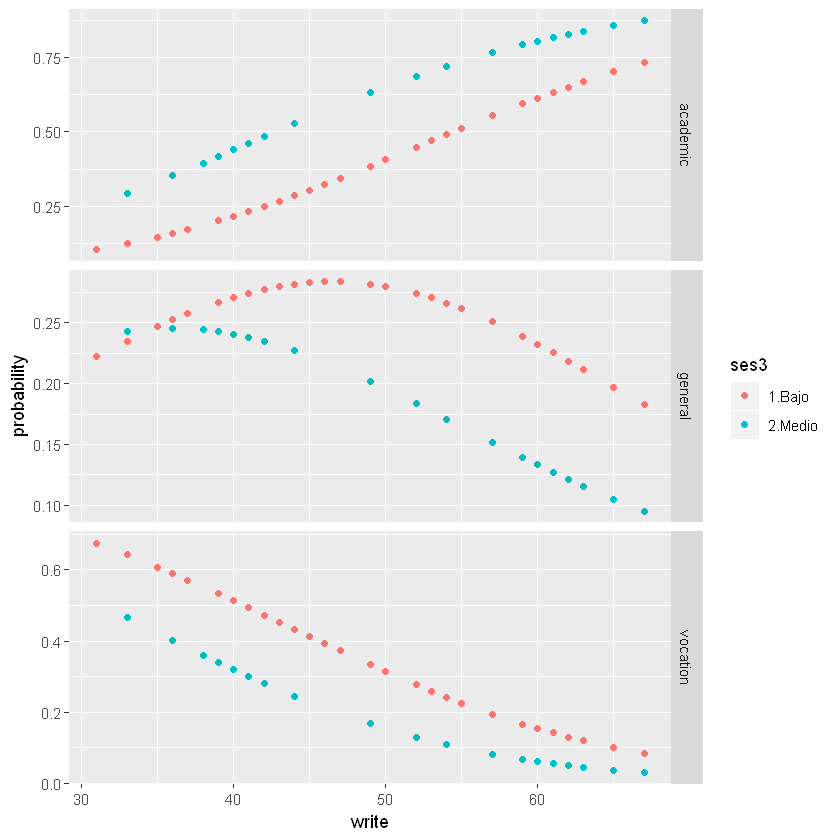

In [44]:
############# 6) GRAFICO DE LA PREDICCION  #####################

datosF <- sqldf::sqldf("select ses3,write from datos")
datosF <- cbind(datosF,probabilidades_result22)

tabla <- reshape2::melt(datosF, id.vars = c("ses3", "write"), value.name = "probability")

# Grafico de las probabilidades

ggplot2::ggplot(tabla, aes(x = write, 
                y = probability, colour = ses3)) + geom_point() + 
                facet_grid(variable ~., scales = "free")

In [45]:
## Prediccion Clase 

ClassPredicted <- predict(resultado22, newdata = datos, "class")
str(ClassPredicted)
str(datos$prog2)

datos$prog2 <- as.factor(datos$prog2)

 Factor w/ 3 levels "academic","general",..: 3 3 1 3 3 3 3 3 3 3 ...
 Factor w/ 3 levels "academic","general",..: 3 2 3 3 3 2 3 3 3 3 ...


In [46]:
## Indicadores para Clase
caret::confusionMatrix(ClassPredicted,datos$prog2)

Confusion Matrix and Statistics

          Reference
Prediction academic general vocation
  academic       92      30       24
  general         0       0        0
  vocation       13      15       26

Overall Statistics
                                          
               Accuracy : 0.59            
                 95% CI : (0.5184, 0.6589)
    No Information Rate : 0.525           
    P-Value [Acc > NIR] : 0.03802         
                                          
                  Kappa : 0.2535          
                                          
 Mcnemar's Test P-Value : 1.865e-10       

Statistics by Class:

                     Class: academic Class: general Class: vocation
Sensitivity                   0.8762          0.000          0.5200
Specificity                   0.4316          1.000          0.8133
Pos Pred Value                0.6301            NaN          0.4815
Neg Pred Value                0.7593          0.775          0.8356
Prevalence                   

In [47]:
MLmetrics::Accuracy(ClassPredicted,datos$prog2)

[1] 0.59

In [48]:
## Ejercicio :: 

# 1)Realicemos el mismo ejercicio separando la target para realizar
# una regresion logistica.

# 2) realizar el modelamiento con el resultado2.2 para una base
# de datos filtrando write > 40 y ver el pronostico en el grafico
# con todos los datos(sin filtros)